# Stroke Prediction Data Exploration

Let's do comprehensive data overview of healthcare-dataset-stroke-data dataset.
The goal is to figure out the steps needed to clean and prepare data for model training.

Source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

#### Acknowledgements
    (Confidential Source) - Use only for educational purposes
    If you use this dataset in your research, please credit the author.

First step is to look into the data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
import math
from scipy.stats import chi2_contingency 
from itertools import product

Read data.

In [2]:
data = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')

Check the general structure.

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Each column is described in the source link.<br>

Attribute Information
1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>
<br>
**Note: "Unknown" in smoking_status means that the information is unavailable for this patient*

In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Columns from 1 to 10 are the features to consider. The 11th is the target 'y' value.

Only the bmi column has some missing values. Anyway, let's look closer to each one.

0 id column

In [7]:
data.id.unique()

array([ 9046, 51676, 31112, ..., 19723, 37544, 44679], dtype=int64)

In [8]:
len(data.id.unique())

5110

In [9]:
data.id.value_counts().shape[0]

5110

Ok, before moving forward let's split data to not make too much assumptions.

In [38]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=24)

In [40]:
print(train_set.head())
print(train_set.info())
print(train_set.describe())
print()
print(train_set.info())

         id  gender   age  hypertension  heart_disease ever_married  \
1408  32826    Male   6.0             0              0           No   
3755  45472    Male  22.0             0              0          Yes   
3287  49753    Male  34.0             0              0           No   
4936  25982    Male  24.0             0              0           No   
3043  38243  Female  37.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
1408       children          Urban              87.74  17.7          Unknown   
3755        Private          Urban             138.55  24.0     never smoked   
3287  Self-employed          Rural              81.54  31.8  formerly smoked   
4936        Private          Rural              91.21  28.1  formerly smoked   
3043        Private          Rural             101.07  26.4          Unknown   

      stroke  
1408       0  
3755       0  
3287       0  
4936       0  
3043       0  
<c

There is not a single redundant person.

1 gender

In [42]:
train_set.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [43]:
train_set.gender.value_counts()

Female    2382
Male      1705
Other        1
Name: gender, dtype: int64

There is only one example for 'Other'. That can affet the prediction for new instances with 'Other' gender. Perhaps there should be more data for this particular type o gender so at the moment - should be deleted?

2 age

In [44]:
train_set.age.value_counts()

78.00    84
52.00    76
51.00    74
57.00    71
53.00    70
         ..
1.72      3
1.40      2
0.40      2
0.08      2
0.16      2
Name: age, Length: 104, dtype: int64

In [45]:
np.histogram(train_set.age)

(array([343, 292, 353, 389, 477, 473, 555, 447, 315, 444], dtype=int64),
 array([8.0000e-02, 8.2720e+00, 1.6464e+01, 2.4656e+01, 3.2848e+01,
        4.1040e+01, 4.9232e+01, 5.7424e+01, 6.5616e+01, 7.3808e+01,
        8.2000e+01]))

In [46]:
train_set.age[data.age < 1].count()

36

In [47]:
train_set.age[data.age < 5].count()

202

In [48]:
train_set.age[data.age < 10].count()

372

In [49]:
train_set.age[data.age < 18].count()

679

There is a lot young individuals. The lower than one year are most probably the infants so it is not considered as an issue. To verify that let's check other theirs' features.

In [50]:
train_set[train_set.age < 1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
2008,67099,Male,0.56,0,0,No,children,Rural,57.02,20.7,Unknown,0
4910,37622,Female,0.32,0,0,No,children,Urban,108.63,19.6,Unknown,0
2490,48406,Male,0.88,0,0,No,children,Urban,85.38,23.4,Unknown,0
1206,68908,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
2579,68382,Male,0.32,0,0,No,children,Urban,127.78,20.8,Unknown,0
4581,15728,Female,0.40,0,0,No,children,Rural,85.65,17.4,Unknown,0
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
3626,23360,Male,0.80,0,0,No,children,Rural,114.54,15.1,Unknown,0


Looks really reasonable. The unknown status of smoking can be left for them because even if that obvious they are not smokers that would be not a reason of stroke in such young age. The second option is to change it but how that can affect the feature influence on the model?

In [51]:
train_set[(train_set.age < 3) & (train_set.age > 1)][:20]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1392,34436,Female,2.00,0,0,No,children,Rural,109.56,16.4,Unknown,0
3092,31481,Female,1.16,0,0,No,children,Urban,97.28,17.8,Unknown,0
830,65218,Male,2.00,0,0,No,children,Rural,109.10,20.0,Unknown,0
3864,67665,Male,2.00,0,0,No,children,Urban,65.21,17.2,Unknown,0
3226,71414,Female,2.00,0,0,No,children,Urban,125.03,19.8,Unknown,0
4277,55337,Female,2.00,0,0,No,children,Rural,126.12,24.8,Unknown,0
3311,37025,Female,2.00,0,0,No,children,Urban,114.02,18.1,Unknown,0
2808,40951,Female,1.24,0,0,No,children,Rural,77.33,19.2,Unknown,0
4001,60774,Male,1.88,0,0,No,children,Rural,68.35,19.1,Unknown,0
1366,35737,Male,1.08,0,0,No,children,Urban,86.09,19.5,Unknown,0


In [52]:
train_set[(train_set.age < 18) & (train_set.stroke == 1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1


In [53]:
f'{(100*train_set.age[(train_set.age < 18) & (train_set.stroke == 1)].count()/train_set.age[train_set.age < 18].count()):.2f}%'

'0.29%'

3 hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

In [54]:
train_set.hypertension.value_counts()

0    3690
1     398
Name: hypertension, dtype: int64

4 heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

In [55]:
train_set.heart_disease.value_counts()

0    3870
1     218
Name: heart_disease, dtype: int64

5 ever_married: "No" or "Yes"

In [56]:
train_set.ever_married.value_counts()

Yes    2687
No     1401
Name: ever_married, dtype: int64

In [57]:
train_set[(train_set.age < 18) & (train_set.ever_married == 'Yes')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [58]:
train_set[(train_set.age < 21) & (train_set.ever_married == 'Yes')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
736,41513,Female,20.0,0,0,Yes,Private,Urban,74.02,22.3,never smoked,0
984,6090,Male,19.0,0,0,Yes,Private,Urban,99.14,28.1,never smoked,0
1169,39661,Male,18.0,0,0,Yes,Private,Rural,140.52,27.4,never smoked,0
4659,21967,Female,20.0,0,0,Yes,Private,Urban,77.96,26.3,smokes,0
839,2543,Female,19.0,0,0,Yes,Private,Rural,90.42,21.4,never smoked,0


The 'yes' and 'no' values to be changes to 1 and 0, accordingly.

6 work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

In [59]:
train_set.work_type.value_counts()

Private          2362
Self-employed     636
children          549
Govt_job          521
Never_worked       20
Name: work_type, dtype: int64

In [60]:
train_set[(train_set.age < 18) & (train_set.work_type == 'Private')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4950,66650,Female,17.0,0,0,No,Private,Urban,68.86,41.1,never smoked,0
4216,41263,Female,16.0,0,0,No,Private,Urban,75.06,23.5,never smoked,0
792,50053,Male,17.0,0,0,No,Private,Urban,62.37,41.3,never smoked,0
3133,26997,Female,16.0,0,0,No,Private,Urban,87.16,28.2,never smoked,0
3964,38132,Female,13.0,0,0,No,Private,Rural,172.27,16.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2716,46256,Male,15.0,0,0,No,Private,Urban,77.55,24.8,Unknown,0
4486,44992,Male,14.0,0,0,No,Private,Urban,126.57,25.9,formerly smoked,0
4887,22013,Female,17.0,0,0,No,Private,Rural,105.91,30.8,never smoked,0
3414,60249,Male,13.0,0,0,No,Private,Urban,141.09,24.0,Unknown,0


In [61]:
train_set[(train_set.age < 18) & (train_set.work_type == 'Self-employed')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2112,9199,Male,13.0,0,0,No,Self-employed,Urban,74.19,31.1,formerly smoked,0
3434,27518,Male,14.0,0,0,No,Self-employed,Rural,72.28,19.0,Unknown,0
956,2879,Female,15.0,0,0,No,Self-employed,Urban,90.10,32.1,never smoked,0
4771,26250,Male,17.0,0,0,No,Self-employed,Urban,113.85,22.9,Unknown,0
775,5046,Male,17.0,0,0,No,Self-employed,Urban,98.42,23.4,Unknown,0
410,54975,Male,7.0,0,0,No,Self-employed,Rural,64.06,18.9,Unknown,0
1739,33768,Female,16.0,0,0,No,Self-employed,Urban,88.85,27.1,Unknown,0
3749,70230,Female,14.0,0,0,No,Self-employed,Rural,77.52,21.9,never smoked,0
288,70970,Female,17.0,0,0,No,Self-employed,Urban,82.18,23.4,Unknown,0
1612,38094,Male,15.0,0,0,No,Self-employed,Urban,68.40,23.0,never smoked,0


In [62]:
train_set[(train_set.age < 18) & (train_set.work_type == 'Govt_job')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4766,2578,Male,16.0,0,0,No,Govt_job,Rural,78.48,22.6,never smoked,0
1589,49815,Female,17.0,0,0,No,Govt_job,Rural,115.93,23.3,never smoked,0
3300,61437,Male,15.0,0,0,No,Govt_job,Rural,142.82,27.6,never smoked,0
3401,34257,Male,17.0,0,0,No,Govt_job,Urban,68.91,23.0,Unknown,0


The thing to check if you can have less than 18 and work for Government. Checked, actually they can.

In [63]:
train_set[(train_set.age > 18) & (train_set.work_type == 'children')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [64]:
train_set[(train_set.age > 18) & (train_set.work_type == 'Never_worked')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
886,13948,Female,19.0,0,0,No,Never_worked,Urban,86.96,25.8,never smoked,0
603,61408,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0


In [65]:
train_set[(train_set.age < 18) & (train_set.work_type == 'Never_worked')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4611,18605,Female,17.0,0,0,No,Never_worked,Urban,78.08,44.9,never smoked,0
2781,23587,Female,16.0,0,0,No,Never_worked,Urban,84.40,25.9,never smoked,0
2346,61219,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
1922,51935,Male,16.0,0,0,No,Never_worked,Urban,59.99,28.2,never smoked,0
959,56986,Male,17.0,0,0,No,Never_worked,Urban,113.25,23.4,never smoked,0
939,16556,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
3468,37209,Male,17.0,0,0,No,Never_worked,Rural,124.38,31.2,never smoked,0
1462,41870,Male,17.0,0,0,No,Never_worked,Rural,61.01,32.5,Unknown,0
2721,23508,Female,17.0,0,0,No,Never_worked,Rural,88.57,31.1,never smoked,0
3972,69559,Male,15.0,0,0,No,Never_worked,Urban,64.29,16.7,Unknown,0


In [66]:
train_set[(train_set.age > 15) & (train_set.work_type == 'children')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4018,29453,Male,16.0,0,0,No,children,Rural,91.58,15.8,Unknown,0
3719,49095,Female,16.0,0,0,No,children,Urban,64.51,21.2,Unknown,0
4604,46691,Male,16.0,0,0,No,children,Urban,140.10,38.7,never smoked,0
4878,30658,Male,16.0,0,0,No,children,Rural,82.44,32.6,Unknown,0
921,32554,Female,16.0,0,0,No,children,Rural,109.02,19.8,Unknown,0
3357,32717,Male,16.0,0,0,No,children,Rural,106.11,22.4,Unknown,0
4545,40887,Male,16.0,0,0,No,children,Urban,135.82,35.1,never smoked,0
1455,72132,Male,16.0,0,0,No,children,Urban,102.30,21.9,Unknown,0
2530,45469,Male,16.0,0,0,No,children,Rural,134.23,30.6,Unknown,0


The 'children' work type is set for individuals below 17 years old. All below 17 need to changed from 'Never_worked' to 'children'

In [67]:
train_set[(train_set.age < 17) & (train_set.work_type == 'Never_worked')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2781,23587,Female,16.0,0,0,No,Never_worked,Urban,84.40,25.9,never smoked,0
2346,61219,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
1922,51935,Male,16.0,0,0,No,Never_worked,Urban,59.99,28.2,never smoked,0
939,16556,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
3972,69559,Male,15.0,0,0,No,Never_worked,Urban,64.29,16.7,Unknown,0
4410,34900,Male,13.0,0,0,No,Never_worked,Urban,85.08,14.6,Unknown,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
3196,57274,Male,14.0,0,0,No,Never_worked,Urban,137.91,41.8,never smoked,0
4068,28734,Female,16.0,0,0,No,Never_worked,Urban,102.10,27.1,never smoked,0
4785,58652,Female,16.0,0,0,No,Never_worked,Rural,68.27,20.4,never smoked,0


7 Residence_type: "Rural" or "Urban"

In [68]:
train_set.Residence_type.value_counts()

Urban    2051
Rural    2037
Name: Residence_type, dtype: int64

8 avg_glucose_level: average glucose level in blood

In [69]:
train_set.avg_glucose_level.value_counts()

93.88     6
91.85     5
84.10     5
72.49     5
83.16     5
         ..
95.85     1
65.30     1
80.94     1
194.98    1
60.50     1
Name: avg_glucose_level, Length: 3340, dtype: int64

In [70]:
train_set.avg_glucose_level.min(), train_set.avg_glucose_level.max()

(55.22, 271.74)

In [71]:
np.histogram(train_set.avg_glucose_level)

(array([1012, 1429,  765,  248,  116,   74,  164,  177,   84,   19],
       dtype=int64),
 array([ 55.22 ,  76.872,  98.524, 120.176, 141.828, 163.48 , 185.132,
        206.784, 228.436, 250.088, 271.74 ]))

In [101]:
train_set.avg_glucose_level[train_set.avg_glucose_level > 100].count()

1979

In [72]:
f'{(100*train_set.avg_glucose_level[train_set.avg_glucose_level > 100].count()/train_set.avg_glucose_level.count()):.2f}%'

'38.65%'

Levels look good, despite almost 40% have some potential insulin problem.

8 bmi: body mass index

In [73]:
train_set.bmi.value_counts()

28.7    31
27.6    29
26.4    29
28.4    29
27.7    29
        ..
54.2     1
64.4     1
47.1     1
12.0     1
54.0     1
Name: bmi, Length: 401, dtype: int64

In [74]:
train_set.id[train_set.bmi.isna()].count()

161

In [75]:
f'{(100*train_set.id[train_set.bmi.isna()].count()/train_set.bmi.count()):.2f}%'

'4.10%'

161 missing data. That 4% of all.

In [76]:
train_set[train_set.bmi.isna()][:50]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
965,5684,Male,40.00,0,0,No,Private,Urban,88.27,NaN,formerly smoked,0
4202,23194,Male,32.00,1,0,No,Private,Rural,74.43,NaN,Unknown,0
4790,1989,Male,37.00,0,0,Yes,Private,Rural,107.06,NaN,smokes,0
1102,18414,Female,23.00,0,0,No,Private,Rural,193.22,NaN,smokes,0
1324,132,Female,80.00,0,0,Yes,Govt_job,Urban,84.86,NaN,Unknown,0
5039,42007,Male,41.00,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
3048,65116,Female,62.00,1,0,Yes,Self-employed,Urban,75.78,NaN,smokes,0
2285,2265,Male,49.00,0,0,Yes,Private,Rural,79.64,NaN,smokes,0
1471,937,Male,7.00,0,0,No,children,Urban,87.94,NaN,Unknown,0
1719,5451,Male,34.00,0,0,Yes,Private,Rural,86.51,NaN,formerly smoked,0


In [77]:
train_set.id[train_set.bmi.isna() & (train_set.stroke == 1)].count()

30

In [78]:
train_set.id[train_set.bmi.isna() & (train_set.stroke == 0)].count()

131

In [79]:
train_set.id[train_set.stroke == 1].count()

199

In [80]:
train_set.id[train_set.stroke == 0].count()

3889

In [81]:
train_set.bmi.min(), train_set.bmi.max()

(11.5, 97.6)

The ratio for NaN BMI is pretty high in relation to whole data set. 

In [ ]:
# fill na with avg or median bmi for stroke/no stroke? but first let's check the correlations etc

10 smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

In [82]:
train_set.smoking_status.value_counts()

never smoked       1507
Unknown            1259
formerly smoked     685
smokes              637
Name: smoking_status, dtype: int64

In [83]:
train_set[(train_set.age < 10) & (train_set.smoking_status == 'Unknown')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1408,32826,Male,6.00,0,0,No,children,Urban,87.74,17.7,Unknown,0
3846,6948,Male,8.00,0,0,No,children,Urban,91.53,18.0,Unknown,0
1392,34436,Female,2.00,0,0,No,children,Rural,109.56,16.4,Unknown,0
1794,46035,Male,1.00,0,0,No,children,Urban,84.85,20.3,Unknown,0
4392,55681,Female,7.00,0,0,No,children,Rural,63.98,23.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4379,17238,Female,9.00,0,0,No,children,Urban,85.00,16.0,Unknown,0
3281,55400,Female,5.00,0,0,No,children,Rural,73.92,17.2,Unknown,0
384,50611,Male,4.00,0,0,No,children,Rural,110.15,17.1,Unknown,0
2588,31473,Male,6.00,0,0,No,children,Rural,79.05,17.9,Unknown,0


In [84]:
train_set[(train_set.age < 18) & (train_set.smoking_status == 'smokes')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2013,64128,Male,10.0,0,0,No,children,Urban,63.08,20.5,smokes,0
2181,22414,Female,17.0,0,0,No,Private,Rural,70.03,23.1,smokes,0
2950,34122,Female,17.0,0,0,No,Private,Urban,87.72,25.9,smokes,0
1512,4833,Female,12.0,0,0,No,children,Rural,207.45,25.4,smokes,0
3496,37395,Female,16.0,0,0,No,Private,Urban,63.63,20.0,smokes,0
4391,63312,Male,16.0,0,0,No,Private,Urban,80.55,23.5,smokes,0
1063,42821,Female,13.0,0,0,No,Private,Rural,60.69,24.0,smokes,0


In [85]:
train_set[(train_set.age < 18) & (train_set.smoking_status == 'formerly smoked')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2112,9199,Male,13.0,0,0,No,Self-employed,Urban,74.19,31.1,formerly smoked,0
3796,57667,Male,12.0,0,0,No,children,Urban,70.07,24.5,formerly smoked,0
2485,53328,Female,14.0,0,0,No,Private,Rural,70.54,24.4,formerly smoked,0
3044,17198,Female,10.0,0,0,No,children,Rural,83.37,17.8,formerly smoked,0
4487,50009,Female,17.0,0,0,No,Private,Urban,81.51,19.5,formerly smoked,0
1774,57109,Female,12.0,0,0,No,children,Rural,81.66,23.5,formerly smoked,0
4230,67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
4361,65966,Female,16.0,0,0,No,Private,Urban,89.14,22.6,formerly smoked,0
4535,33102,Male,10.0,0,0,No,children,Rural,69.20,23.5,formerly smoked,0
2526,62454,Female,12.0,0,0,No,children,Urban,63.98,21.2,formerly smoked,0


Some of the unknown status can be cleared by checking the age. Let's say all kids below 10 or so can be considered as 'never smoked'. There is many rows without specified status. Need to come back to that...

11 stroke: 1 if the patient had a stroke or 0 if not

In [86]:
train_set.stroke.value_counts()

0    3889
1     199
Name: stroke, dtype: int64

Target values look ok.

Let's review the relations of the features.

In [87]:
train_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1408,32826,Male,6.0,0,0,No,children,Urban,87.74,17.7,Unknown,0
3755,45472,Male,22.0,0,0,Yes,Private,Urban,138.55,24.0,never smoked,0
3287,49753,Male,34.0,0,0,No,Self-employed,Rural,81.54,31.8,formerly smoked,0
4936,25982,Male,24.0,0,0,No,Private,Rural,91.21,28.1,formerly smoked,0
3043,38243,Female,37.0,0,0,Yes,Private,Rural,101.07,26.4,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2193,23413,Female,26.0,0,0,No,Private,Urban,97.24,22.5,never smoked,0
3473,22548,Female,34.0,0,0,Yes,Private,Urban,91.02,25.8,never smoked,0
343,45053,Male,64.0,0,0,Yes,Govt_job,Urban,239.64,34.6,formerly smoked,0
899,68438,Female,51.0,0,0,Yes,Private,Rural,90.78,32.3,never smoked,0


1 gender

In [88]:
def plot_barplot(df, x, y):
    plt.figure(figsize=(15, 8))
    plt.title(f'The {y} by {x}', size='x-large')
    sns.barplot(x=x, y=y, data=df)

In [89]:
def plot_boxplot(df, x, y):
    plt.figure(figsize=(15, 8))
    plt.title(f'The {y} by {x}', size='x-large')
    sns.boxplot(x=x, y=y, data=df)

In [90]:
def plot_regplot(df, x, y):
    plt.figure(figsize=(15, 8))
    plt.title(f'The {y} by {x} with linear regression', size='x-large')
    sns.regplot(x=x, y=y, data=df)

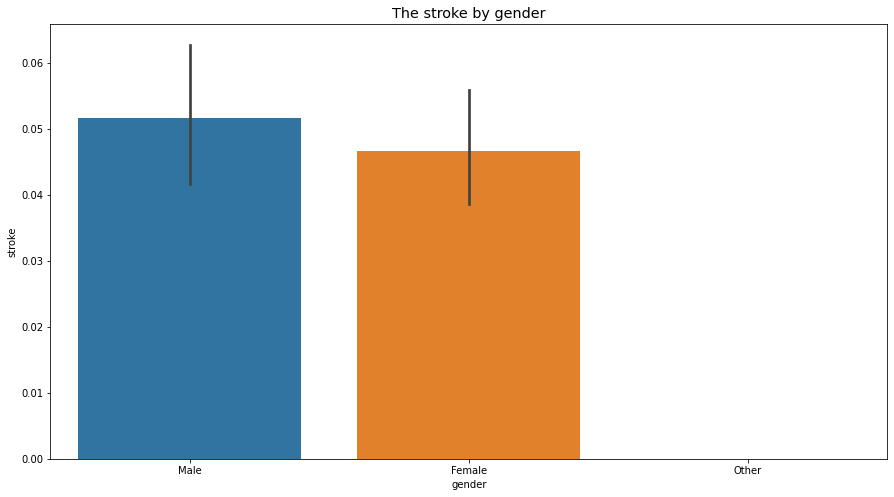

In [91]:
plot_barplot(train_set, 'gender', 'stroke')

In [92]:
def plot_counter_plot(df, x, y, h=None):
    ''' Thr h is a hue. '''
    plt.figure(figsize=(15, 8))
    plt.title(f'The {y} by {x}', size='x-large')
    if h:
        sns.countplot(x=x, data=df[[x, y]], hue=h)
    else:
        sns.countplot(x=x, data=df[[x, y]])

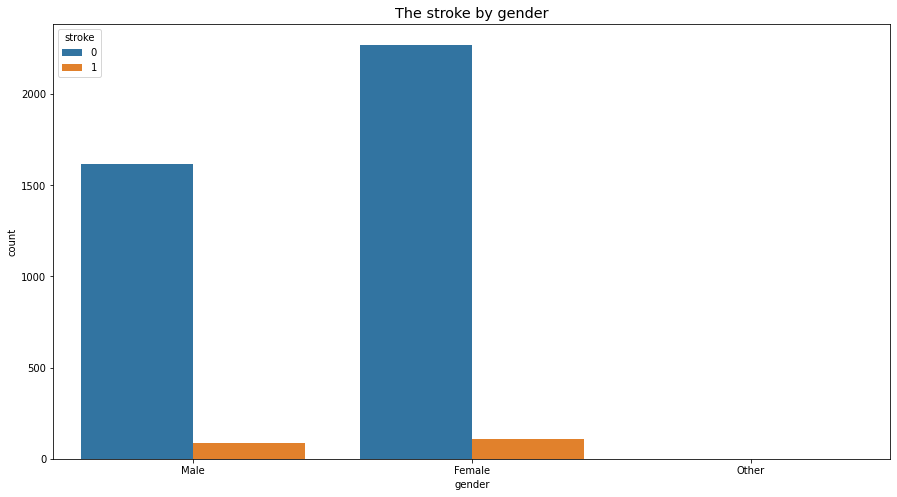

In [93]:
plot_counter_plot(train_set, 'gender', 'stroke', 'stroke')

In [94]:
male_sr = 100*train_set.gender[(train_set.gender == 'Male') & train_set.stroke].count()/train_set.gender[train_set.gender == 'Male'].count()
f"{male_sr:.2f}%"

'5.16%'

In [95]:
female_sr = 100*train_set.gender[(train_set.gender == 'Female') & train_set.stroke].count()/train_set.gender[train_set.gender == 'Female'].count()
f"{female_sr:.2f}%"

'4.66%'

In [96]:
male_count = train_set.gender[train_set.gender == 'Male'].count()

In [97]:
female_count = train_set.gender[train_set.gender == 'Female'].count()

In [98]:
def rand_test_for_stroke(df, n, i_no):
    ''' Perform randomization test. 
        The df is a data frame.
        The n is a sample size.
        The i_no is a number of tests to run. 
        Returns mean of the results and list of the results.'''
    results = []
    for i in range(i_no):
        df_sam = df.sample(n=n).copy()
        result = 100*df_sam.id[df_sam.stroke == 1].count()/n
        results.append(result)
    return round(np.mean(results), 2), results

In [99]:
%%time
mean_res, results = rand_test_for_stroke(train_set, male_count, 10000)

Wall time: 10.3 s


P-value calculation.

In [100]:
np.mean(results >= male_sr)

0.249

In [101]:
%%time
mean_res, results = rand_test_for_stroke(train_set, female_count, 10000)

Wall time: 10.7 s


In [102]:
np.mean(results >= female_sr)

0.7904

For both genders the p-value is pretty high. Seems the gender feature is not statistically significant. Despite the female are much closer to one value.

2 age

In [103]:
def plot_swarmplot_for_stroke_status(df, y, stroke=1):
    ''' Plot swarmplot of y for stroke status 1 or 0 based on df data. '''
    plt.figure(figsize=(15, 8))
    plt.title(f'The {y} for stroke status {stroke}', size='x-large')
    sns.swarmplot(x='stroke', y=y, data=df[df.stroke == stroke])

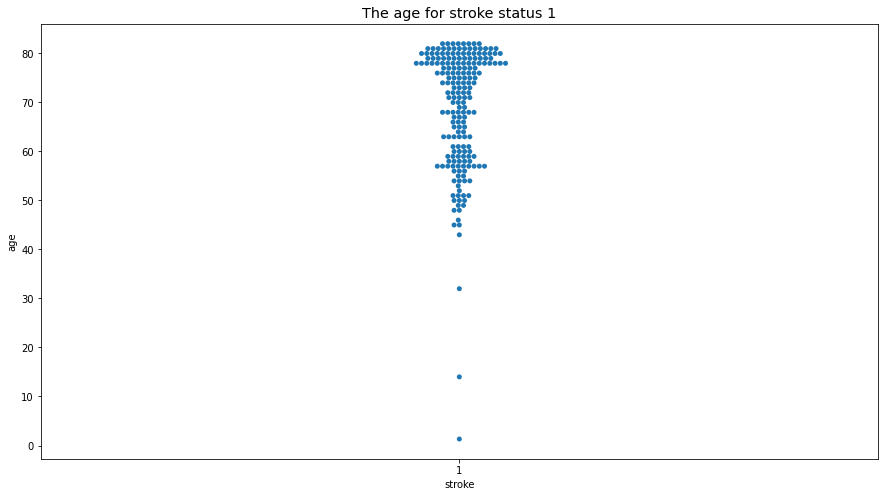

In [104]:
plot_swarmplot_for_stroke_status(train_set, 'age')

In [105]:
def plot_histplot(df, x, hue=None):
    plt.figure(figsize=(15, 8))
    plt.title(f'The histogram for {x}.', size='x-large')
    if hue:
        sns.histplot(x=x, data=df, hue=hue)
    else:
        sns.histplot(x=x, data=df)

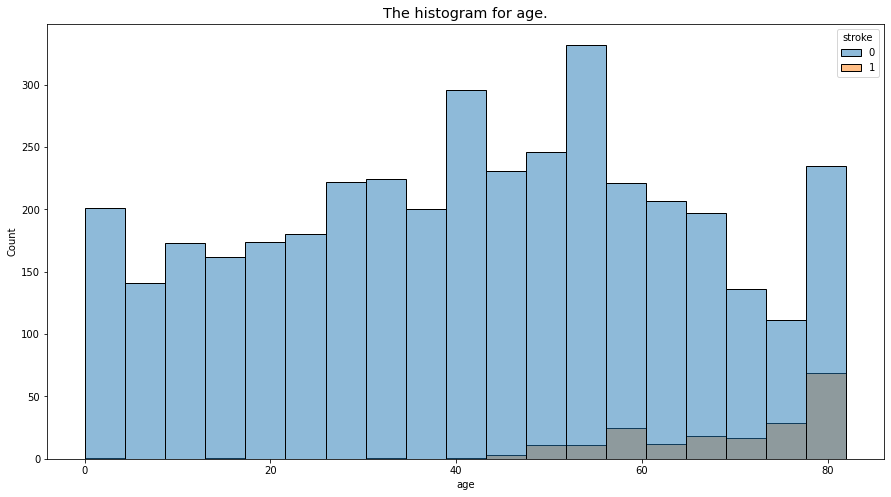

In [106]:
plot_histplot(train_set, 'age', 'stroke')

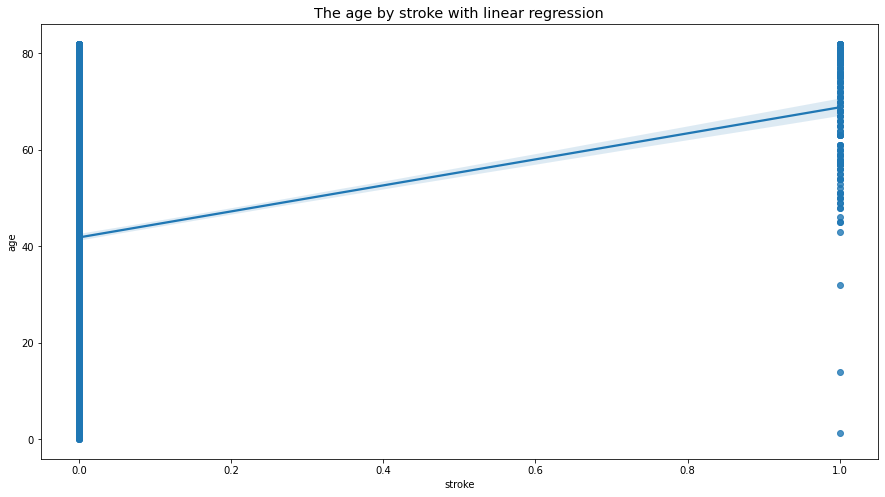

In [107]:
plot_regplot(train_set, 'stroke', 'age')

There is a correlation between the age and stroke. The age feature is significant.

3 hypertension 

In [108]:
train_set.hypertension.value_counts()

0    3690
1     398
Name: hypertension, dtype: int64

Let's use the Phi coefficient

In [109]:
def get_phi_coef(df, col1, col2):
    ''' Calculate phi coefficient for two binary features.
        Returns the phi coeficient [-1, 1]:
        -1 means perfectly negative correlation
        0 means no correlation
        1 means perfectly positive correlation.'''
    n11 = df.id[(df[col1] == 1) & (df[col2] == 1)].count()
    n10 = df.id[(df[col1] == 1) & (df[col2] == 0)].count()
    n01 = df.id[(df[col1] == 0) & (df[col2] == 1)].count()
    n00 = df.id[(df[col1] == 0) & (df[col2] == 0)].count()
    n1x = np.uint64(n11 + n10)
    n0x = np.uint64(n01 + n00)
    nx1 = np.uint64(n11 + n01)
    nx0 = np.uint64(n10 + n00)
    return (n11*n00-n10*n01)/math.sqrt(n1x*n0x*nx1*nx0)

In [110]:
phi = get_phi_coef(train_set, 'hypertension', 'stroke')

In [111]:
phi

0.1442765130205252

The phi coefficient indicate there is not strong, even mild correlation between these two features.

Let's calculate the p-value for randomized test.

In [112]:
def get_p_value_for_bin_feature_and_stroke(df, feature, n):
    ''' Calculate the p-value for given binary feature and stroke using randomized test.
        The n indicates the rand test iterations.
        Returns p-value for positive state. '''
    positive_stroke_ratio = 100*df.id[(df[feature] == 1) & df.stroke].count()/df.id[df[feature] == 1].count()
    positive_count = df.id[df[feature] == 1].count()
#     negative_stroke_ratio = 100*df.id[(df[feature] == 0) & df.stroke].count()/df.id[df[feature] == 0].count()
#     negative_count = df.id[df[feature] == 0].count()
    _, results = rand_test_for_stroke(df, positive_count, n)
    return np.mean(results >= positive_stroke_ratio)

In [113]:
p_value = get_p_value_for_bin_feature_and_stroke(train_set, 'hypertension', 10000)

In [114]:
p_value

0.0

Despite the phi coef is pretty low the hypertension feature can be informative for the model traning. Seems there is some dependency between hypertension and sroke.

4 heart_disease

In [115]:
train_set.heart_disease.value_counts()

0    3870
1     218
Name: heart_disease, dtype: int64

In [116]:
phi = get_phi_coef(train_set, 'heart_disease', 'stroke')

In [117]:
phi

0.13856112751080968

In [118]:
p_value = get_p_value_for_bin_feature_and_stroke(train_set, 'heart_disease', 10000)

In [119]:
p_value

0.0

Looks similar to the hypertension feature.

5 ever_married

In [120]:
train_set.ever_married.value_counts()

Yes    2687
No     1401
Name: ever_married, dtype: int64

In [121]:
data_em_bin = train_set.copy()
data_em_bin.ever_married.replace({'Yes': 1, 'No': 0}, inplace=True)

In [122]:
phi = get_phi_coef(data_em_bin, 'ever_married', 'stroke')
p_value = get_p_value_for_bin_feature_and_stroke(data_em_bin, 'ever_married', 10000)

In [123]:
phi, p_value

(0.10106909618714191, 0.0)

It is pretty interesting that ever_married feature 'Yes' has much higher stoke ratio. 

6   work_type 

In [124]:
train_set.work_type.value_counts()

Private          2362
Self-employed     636
children          549
Govt_job          521
Never_worked       20
Name: work_type, dtype: int64

Let's correct the Never_worked for < 17 to children value.

In [128]:
train_set = train_set.copy() # there was some bug w/o this
train_set.loc[(train_set.age < 17) & (train_set.work_type == 'Never_worked'), 'work_type'] = 'children'

In [129]:
train_set.work_type.value_counts()

Private          2362
Self-employed     636
children          560
Govt_job          521
Never_worked        9
Name: work_type, dtype: int64

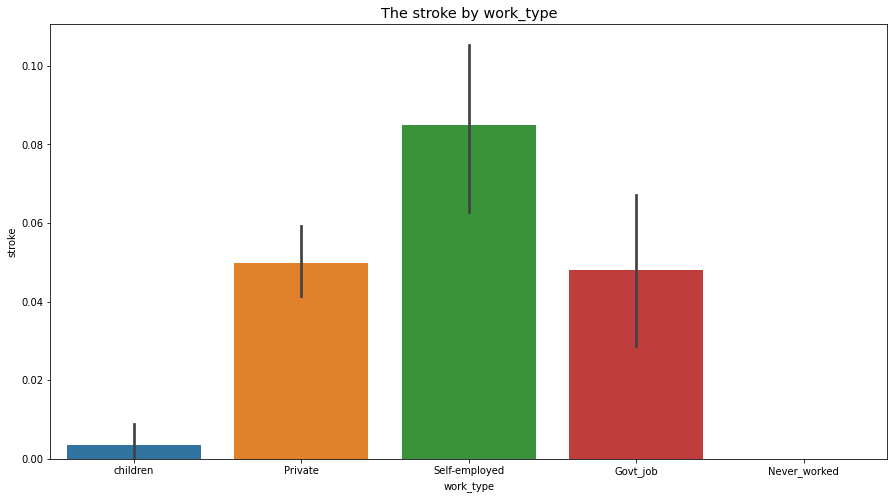

In [130]:
plot_barplot(train_set, 'work_type', 'stroke')

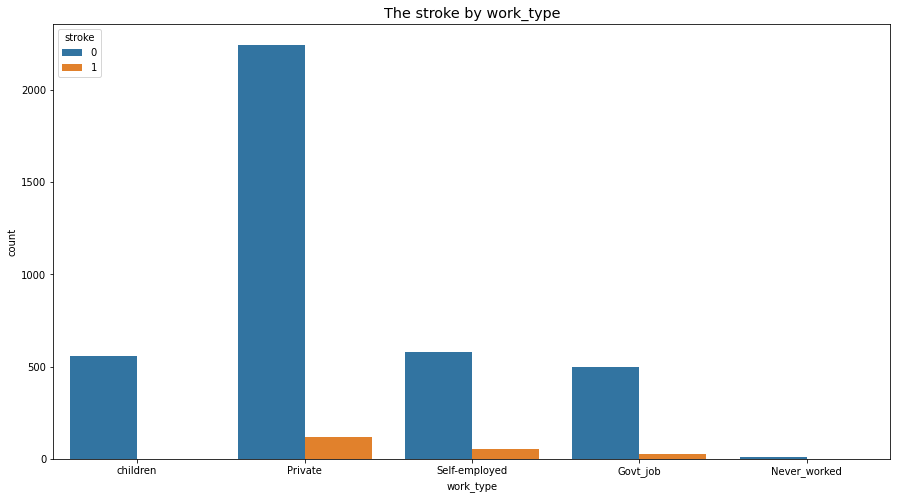

In [131]:
plot_counter_plot(train_set, 'work_type', 'stroke', 'stroke')

It is very noticeable that there is big difference between Self-employed and children value.

 7   Residence_type

In [132]:
train_set.Residence_type.value_counts()

Urban    2051
Rural    2037
Name: Residence_type, dtype: int64

In [134]:
# for checking purpose
data_rt_bin = train_set.copy()
data_rt_bin.Residence_type.replace({'Urban': 1, 'Rural': 0}, inplace=True)

In [136]:
data_rt_bin.Residence_type.value_counts()

1    2051
0    2037
Name: Residence_type, dtype: int64

In [137]:
phi = get_phi_coef(data_rt_bin, 'Residence_type', 'stroke')
p_value = get_p_value_for_bin_feature_and_stroke(data_rt_bin, 'Residence_type', 10000)

In [138]:
phi, p_value

(0.007182416008702815, 0.3462)

Seems the Residence_type feature is not too informative. Can be skipped.

 8   avg_glucose_level

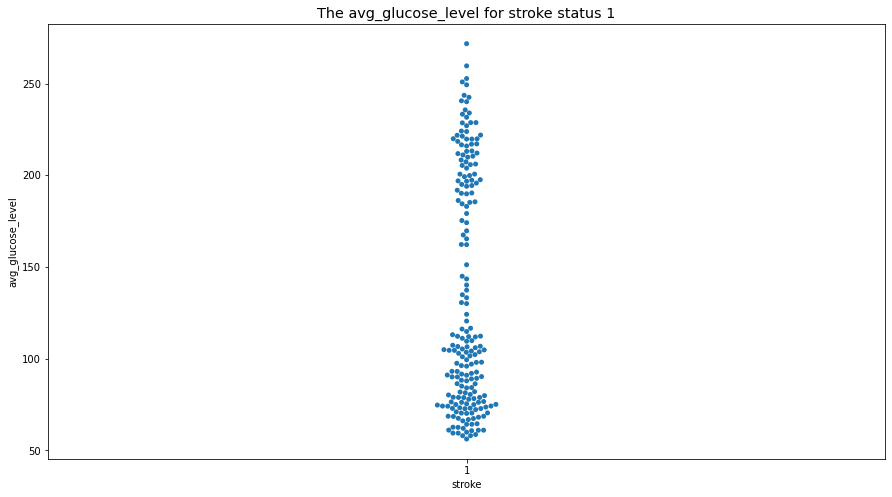

In [139]:
 plot_swarmplot_for_stroke_status(train_set, 'avg_glucose_level')

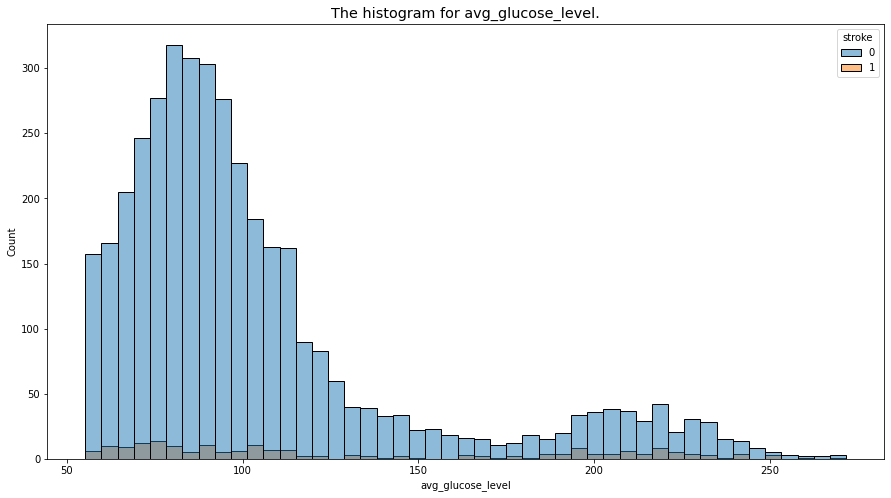

In [140]:
plot_histplot(train_set, 'avg_glucose_level', 'stroke')

The most stroke cases are near to standard glucose range where is majority of the individuals. Anyway, there is some increasment above ~190 level. 

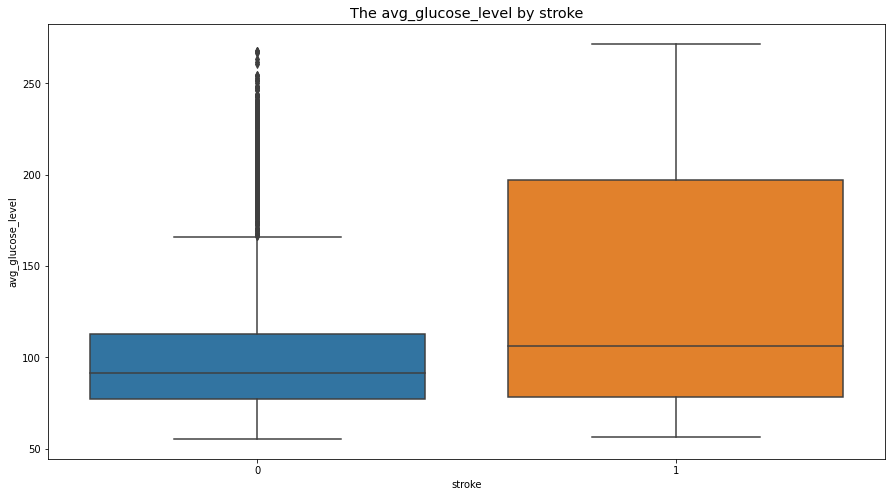

In [141]:
plot_boxplot(train_set, 'stroke', 'avg_glucose_level')

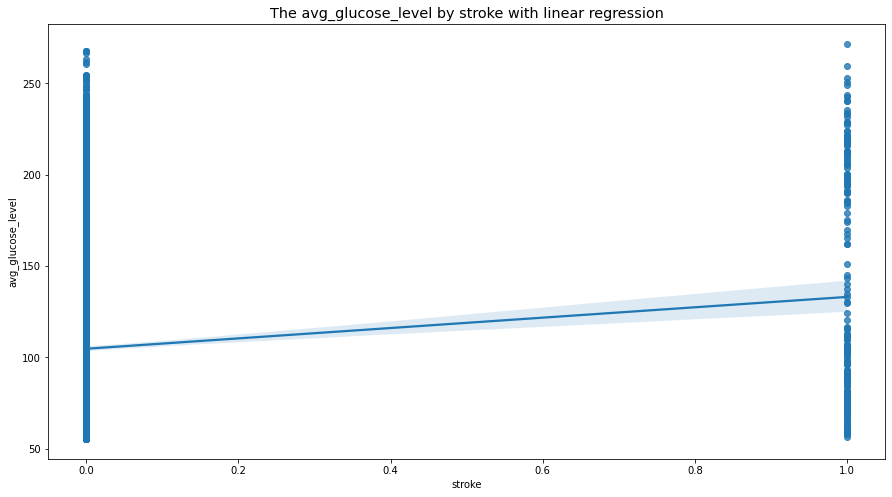

In [142]:
plot_regplot(train_set, 'stroke', 'avg_glucose_level')

Seems there is some mild relationship between the glucose level and stroke.

9   bmi

In [143]:
train_set.id[train_set.bmi.isna()].count()

161

Let's ignore the n/a value for now.

In [144]:
data_bmi_bin = train_set[~train_set.bmi.isna()].copy()

In [145]:
data_bmi_bin.shape[0]

3927

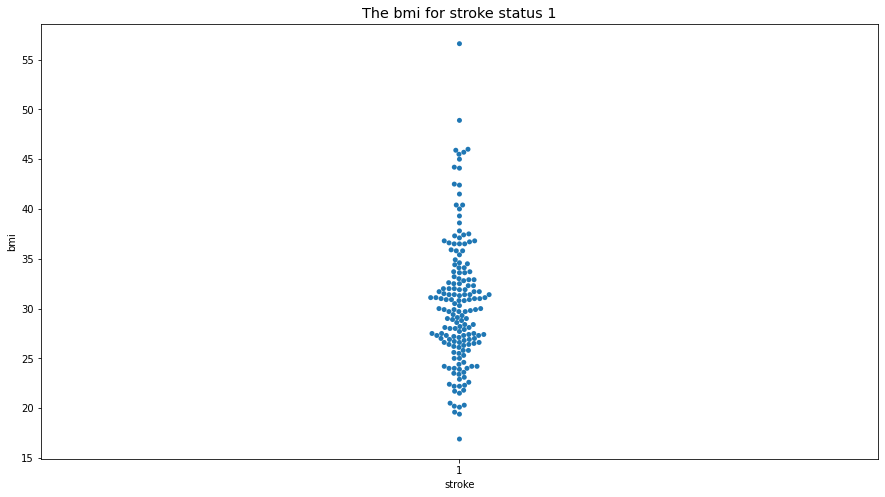

In [146]:
 plot_swarmplot_for_stroke_status(data_bmi_bin, 'bmi')

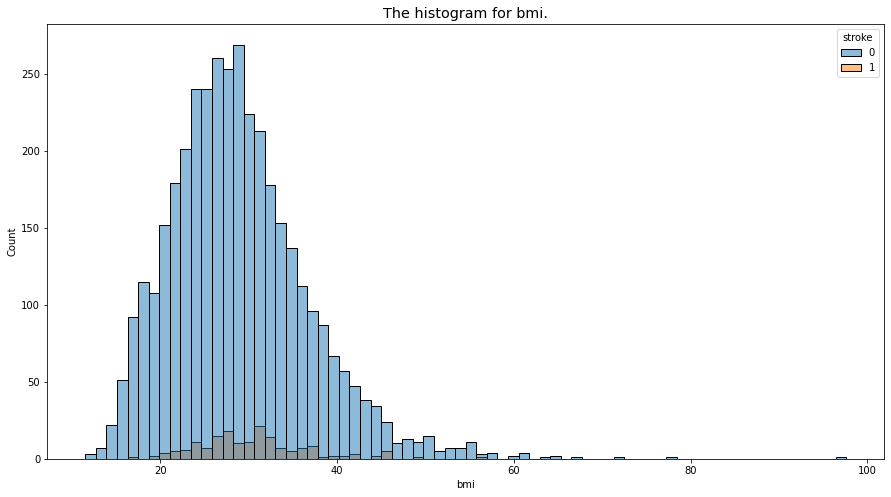

In [147]:
plot_histplot(data_bmi_bin, 'bmi', 'stroke')

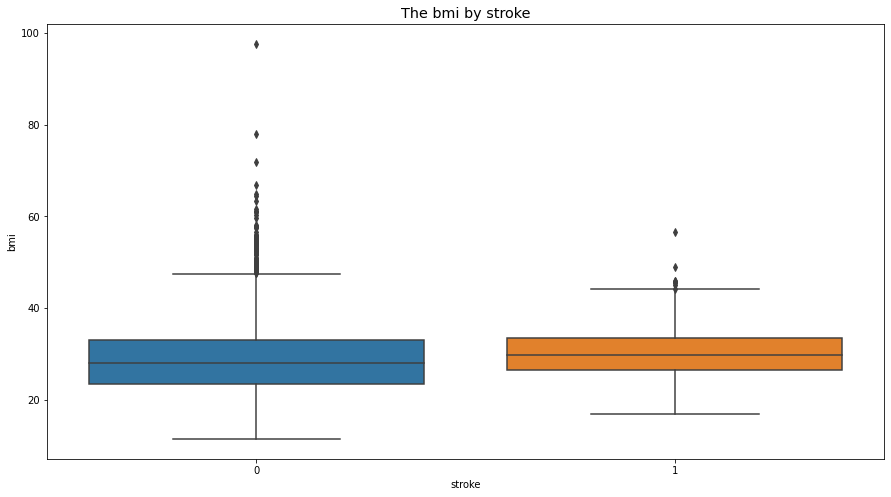

In [148]:
plot_boxplot(data_bmi_bin, 'stroke', 'bmi')

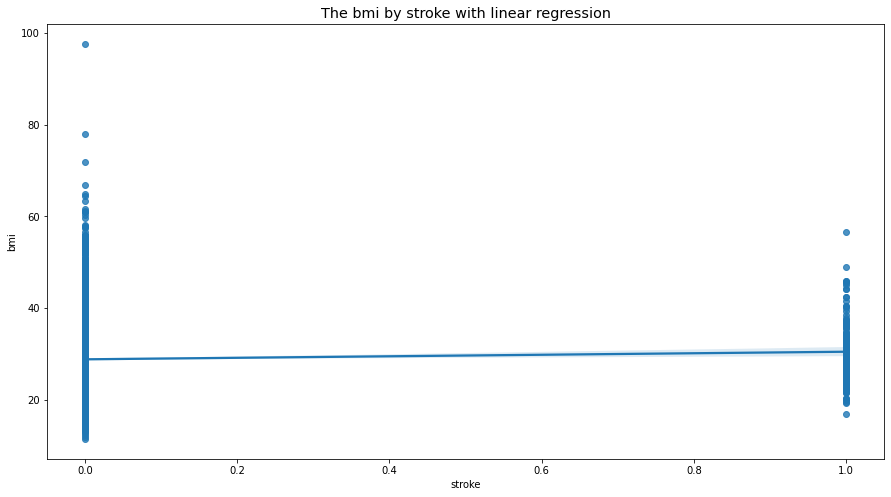

In [149]:
plot_regplot(data_bmi_bin, 'stroke', 'bmi')

That does not look like bmi have any impact on stroke. Furthermore, the BMI is pretty weak measure because does not include the body composition. Looks like redundant feature.

10 smoking_status

In [150]:
train_set.smoking_status.value_counts()

never smoked       1507
Unknown            1259
formerly smoked     685
smokes              637
Name: smoking_status, dtype: int64

In [151]:
train_set[(train_set.age < 10) & (train_set.smoking_status == 'Unknown')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1408,32826,Male,6.00,0,0,No,children,Urban,87.74,17.7,Unknown,0
3846,6948,Male,8.00,0,0,No,children,Urban,91.53,18.0,Unknown,0
1392,34436,Female,2.00,0,0,No,children,Rural,109.56,16.4,Unknown,0
1794,46035,Male,1.00,0,0,No,children,Urban,84.85,20.3,Unknown,0
4392,55681,Female,7.00,0,0,No,children,Rural,63.98,23.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4379,17238,Female,9.00,0,0,No,children,Urban,85.00,16.0,Unknown,0
3281,55400,Female,5.00,0,0,No,children,Rural,73.92,17.2,Unknown,0
384,50611,Male,4.00,0,0,No,children,Rural,110.15,17.1,Unknown,0
2588,31473,Male,6.00,0,0,No,children,Rural,79.05,17.9,Unknown,0


In [152]:
train_set.loc[(train_set.age < 10) & (train_set.smoking_status == 'Unknown'), 'smoking_status'] = 'never smoked'

In [153]:
train_set.smoking_status.value_counts()

never smoked       1879
Unknown             887
formerly smoked     685
smokes              637
Name: smoking_status, dtype: int64

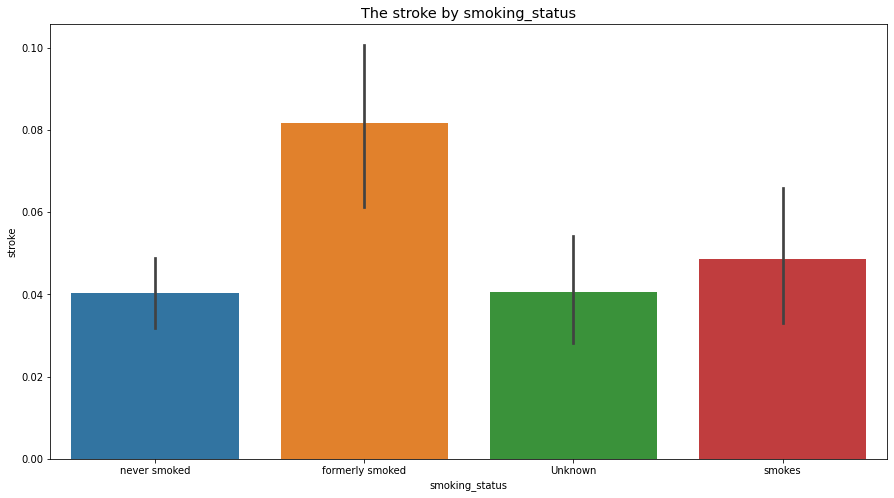

In [154]:
plot_barplot(train_set, 'smoking_status', 'stroke')

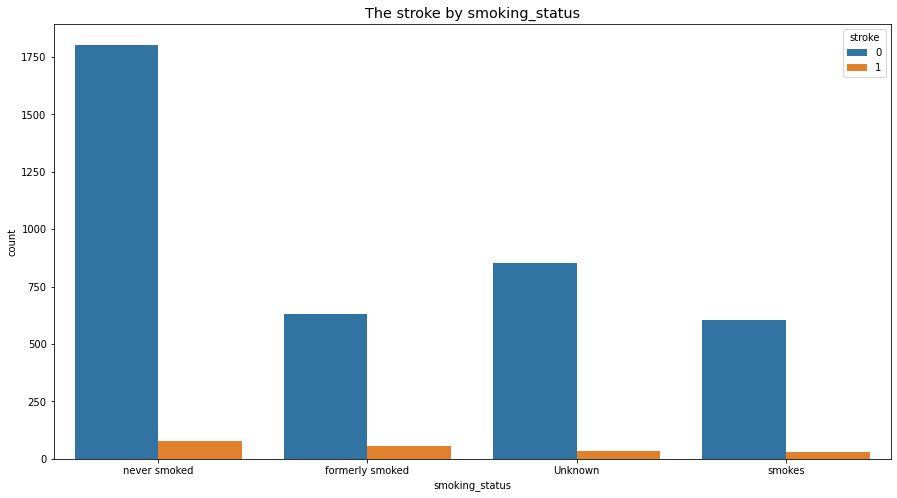

In [155]:
plot_counter_plot(train_set, 'smoking_status', 'stroke', 'stroke')

Hard to say. Let's perform additional test, the chi-square test.

In [156]:
chisqr_df = pd.crosstab(train_set.smoking_status, train_set.stroke, margins=True)

In [157]:
chisqr_df

stroke,0,1,All
smoking_status,,,
Unknown,851,36,887
formerly smoked,629,56,685
never smoked,1803,76,1879
smokes,606,31,637
All,3889,199,4088


In [158]:
chisqr_result = chi2_contingency(chisqr_df)

In [159]:
chisqr_result[:3] # (statistical value, p-value, degree of freedom)

(20.18345111022219, 0.009663835337909234, 8)

The p-value is pretty low so that indicate the smoking_status could have impact on the stroke.

Let's check it for all categorical data.

In [160]:
train_set.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Let's change the hypertension, heart_disease and stroke to the object types

In [161]:
data_temp = train_set.copy()

In [162]:
data_temp[['hypertension', 'heart_disease', 'stroke']] = data_temp[['hypertension', 'heart_disease', 'stroke']].astype('object')

In [163]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 1408 to 4514
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4088 non-null   int64  
 1   gender             4088 non-null   object 
 2   age                4088 non-null   float64
 3   hypertension       4088 non-null   object 
 4   heart_disease      4088 non-null   object 
 5   ever_married       4088 non-null   object 
 6   work_type          4088 non-null   object 
 7   Residence_type     4088 non-null   object 
 8   avg_glucose_level  4088 non-null   float64
 9   bmi                3927 non-null   float64
 10  smoking_status     4088 non-null   object 
 11  stroke             4088 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 544.2+ KB


In [164]:
data_temp.columns[(data_temp.dtypes == 'object')]

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'stroke'],
      dtype='object')

In [165]:
data_chi = data_temp[data_temp.columns[(data_temp.dtypes == 'object')]].copy()

In [166]:
data_chi

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
1408,Male,0,0,No,children,Urban,never smoked,0
3755,Male,0,0,Yes,Private,Urban,never smoked,0
3287,Male,0,0,No,Self-employed,Rural,formerly smoked,0
4936,Male,0,0,No,Private,Rural,formerly smoked,0
3043,Female,0,0,Yes,Private,Rural,Unknown,0
...,...,...,...,...,...,...,...,...
2193,Female,0,0,No,Private,Urban,never smoked,0
3473,Female,0,0,Yes,Private,Urban,never smoked,0
343,Male,0,0,Yes,Govt_job,Urban,formerly smoked,0
899,Female,0,0,Yes,Private,Rural,never smoked,0


In [167]:
data_chi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 1408 to 4514
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          4088 non-null   object
 1   hypertension    4088 non-null   object
 2   heart_disease   4088 non-null   object
 3   ever_married    4088 non-null   object
 4   work_type       4088 non-null   object
 5   Residence_type  4088 non-null   object
 6   smoking_status  4088 non-null   object
 7   stroke          4088 non-null   object
dtypes: object(8)
memory usage: 416.5+ KB


In [168]:
cols = list(data_chi.columns)

In [169]:
cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

In [170]:
cols_combs = list(product(cols,cols, repeat = 1))

In [171]:
cols_combs

[('gender', 'gender'),
 ('gender', 'hypertension'),
 ('gender', 'heart_disease'),
 ('gender', 'ever_married'),
 ('gender', 'work_type'),
 ('gender', 'Residence_type'),
 ('gender', 'smoking_status'),
 ('gender', 'stroke'),
 ('hypertension', 'gender'),
 ('hypertension', 'hypertension'),
 ('hypertension', 'heart_disease'),
 ('hypertension', 'ever_married'),
 ('hypertension', 'work_type'),
 ('hypertension', 'Residence_type'),
 ('hypertension', 'smoking_status'),
 ('hypertension', 'stroke'),
 ('heart_disease', 'gender'),
 ('heart_disease', 'hypertension'),
 ('heart_disease', 'heart_disease'),
 ('heart_disease', 'ever_married'),
 ('heart_disease', 'work_type'),
 ('heart_disease', 'Residence_type'),
 ('heart_disease', 'smoking_status'),
 ('heart_disease', 'stroke'),
 ('ever_married', 'gender'),
 ('ever_married', 'hypertension'),
 ('ever_married', 'heart_disease'),
 ('ever_married', 'ever_married'),
 ('ever_married', 'work_type'),
 ('ever_married', 'Residence_type'),
 ('ever_married', 'smoking

In [172]:
results = []

In [173]:
for col1, col2 in cols_combs:
    if col1 != col2:
        chi_sqr = chi2_contingency(pd.crosstab(data_chi[col1], data_chi[col2]))[1]
        results.append((col1,col2,chi_sqr))

In [174]:
results

[('gender', 'hypertension', 0.7177730761281724),
 ('gender', 'heart_disease', 3.466424295147536e-05),
 ('gender', 'ever_married', 0.10637649177041202),
 ('gender', 'work_type', 7.377075559046912e-06),
 ('gender', 'Residence_type', 0.6011568707915463),
 ('gender', 'smoking_status', 0.0009168713856457943),
 ('gender', 'stroke', 0.7443391640240542),
 ('hypertension', 'gender', 0.7177730761281724),
 ('hypertension', 'heart_disease', 6.222520903410883e-12),
 ('hypertension', 'ever_married', 5.123705619504485e-26),
 ('hypertension', 'work_type', 3.855350268274643e-21),
 ('hypertension', 'Residence_type', 0.33263040419353634),
 ('hypertension', 'smoking_status', 1.9713202808694084e-09),
 ('hypertension', 'stroke', 8.860956299730397e-20),
 ('heart_disease', 'gender', 3.466424295147536e-05),
 ('heart_disease', 'hypertension', 6.222520903410883e-12),
 ('heart_disease', 'ever_married', 5.292695271311438e-13),
 ('heart_disease', 'work_type', 2.4524625277185784e-11),
 ('heart_disease', 'Residence_t

Seems the previous observations are in accordance with the chi2_contingency results. The gender and Residence_type features can be dropped.

Let's go to create the clean up and preprocessing pipeline in separate notebook.